In [1]:
import sys,os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [3]:
# Import the EDAProcessor class from the src folder
from EDA_processor import EDAProcessor


In [4]:
# Configure logging
from logger import setup_logger
logger = setup_logger()

logger.info("Imported necessary libraries.")

2025-01-24 15:57:36,432 - INFO - Imported necessary libraries.


In [5]:
# Define the path to your dataset
file_path = "../data/data.csv"  # Adjust path as necessary


In [6]:
# Initialize the EDA processor
logger.info("Data loading initiated.")
eda = EDAProcessor(file_path)
logger.info("Data loaded successfully.")

2025-01-24 15:57:36,465 - INFO - Data loading initiated.
2025-01-24 15:57:36,972 - INFO - Data loaded successfully.


Data successfully loaded.


**Data overview:**
- Provide an overview of the dataset including shape, data types, missing values, and first few rows.

In [7]:
# Overview of the data
print("### Data Overview ###")
eda.data_overview()

### Data Overview ###
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 no

**_Data Overview Summary_**

- The dataset contains 95,662 rows and 15 columns, providing a substantial amount of data for analysis.

- The data types are generally correct, except for the TransactionStartTime column, which is currently stored as an object. This column should be converted to datetime format for accurate time-based analysis.

- No missing values were detected in any of the columns, ensuring the dataset is complete and ready for further analysis without the need for imputation.

In [8]:
# Summary Statistics
print("\n### Summary Statistics ###")
data_summary = eda.summary_statistics()
data_summary.head(10)


### Summary Statistics ###
Summary Statistics:
                        count unique                   top   freq  \
TransactionId           95662  95662   TransactionId_35670      1   
BatchId                 95662  94809         BatchId_67019     28   
AccountId               95662   3633        AccountId_4841  30893   
SubscriptionId          95662   3627   SubscriptionId_3829  32630   
CustomerId              95662   3742       CustomerId_7343   4091   
CurrencyCode            95662      1                   UGX  95662   
CountryCode           95662.0    NaN                   NaN    NaN   
ProviderId              95662      6          ProviderId_4  38189   
ProductId               95662     23           ProductId_6  32635   
ProductCategory         95662      9    financial_services  45405   
ChannelId               95662      4           ChannelId_3  56935   
Amount                95662.0    NaN                   NaN    NaN   
Value                 95662.0    NaN                   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_35670,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**_Observations:_**

- The CountryCode is constant at 256, indicating no variability in this column.

- The Amount and Value features show a high degree of skewness (both over 51), indicating potential outliers or heavy-tailed distributions.

- PricingStrategy is fairly stable with most values centered around 2.

- FraudResult has a very low mean, indicating a low occurrence of fraudulent transactions, with a highly positive skewness suggesting a majority of zeros.

Processing time-series data for TransactionStartTime...


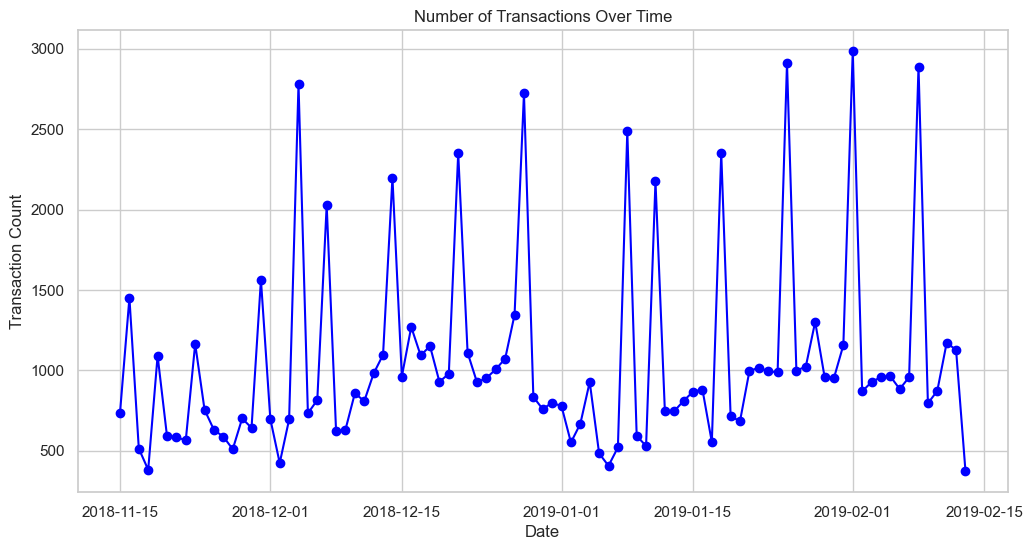

In [9]:
#distribution transaction start time
feature = ["TransactionStartTime"]
eda.plot_numerical_distributions(feature)

In [10]:
# List of numerical and categorical features
numerical_features = ["Amount", "PricingStrategy","CountryCode", "Value", "FraudResult"]
categorical_features = [
    
    "CurrencyCode", "ProviderId","ChannelId",   "ProductCategory",
    
]


### Distribution of Numerical Features ###


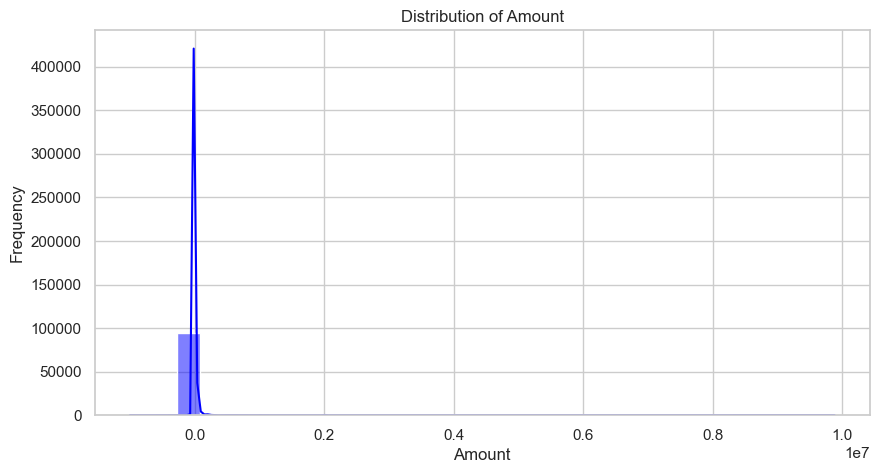

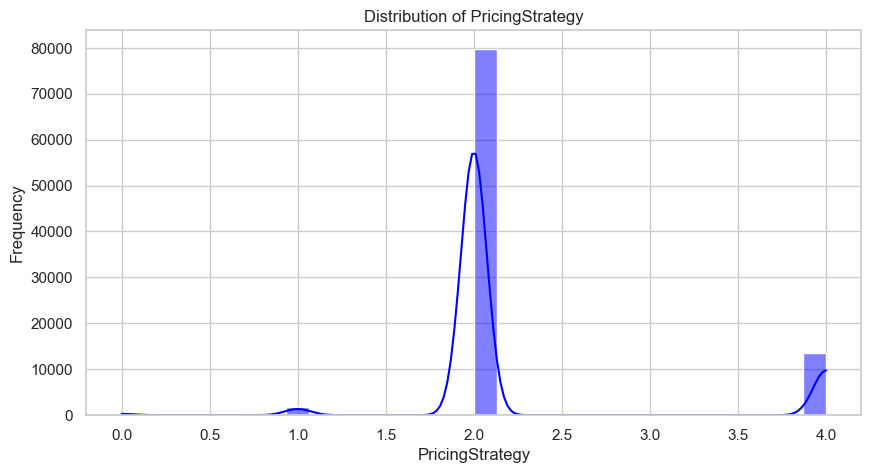

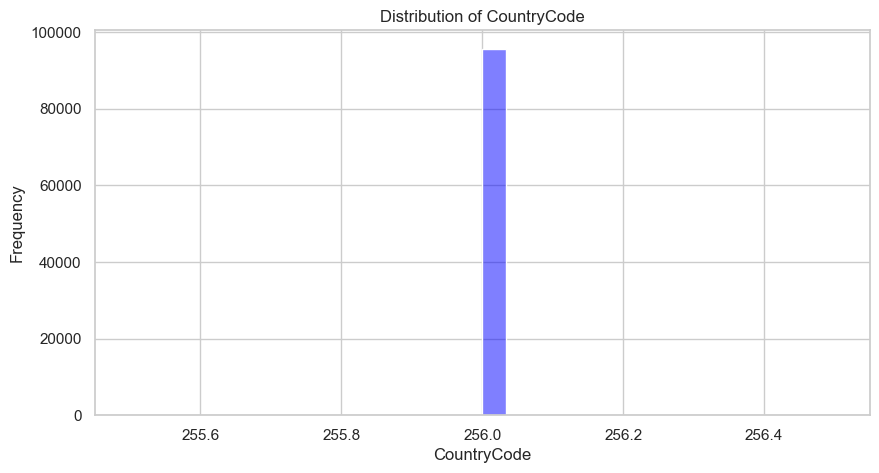

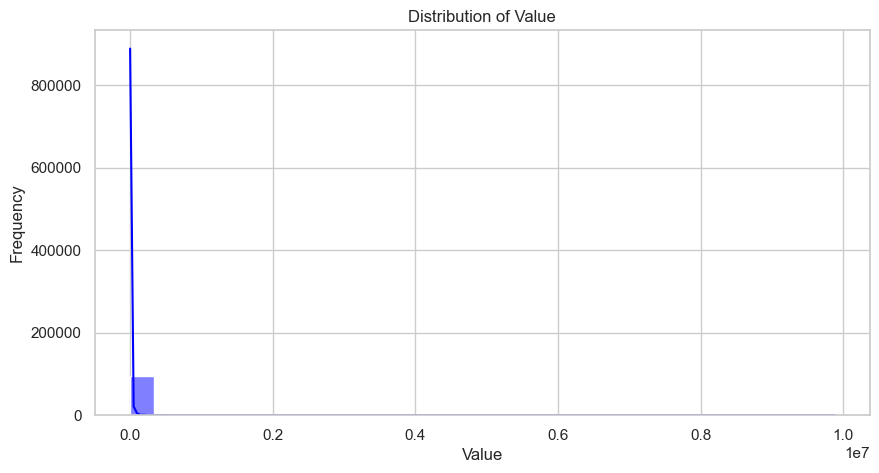

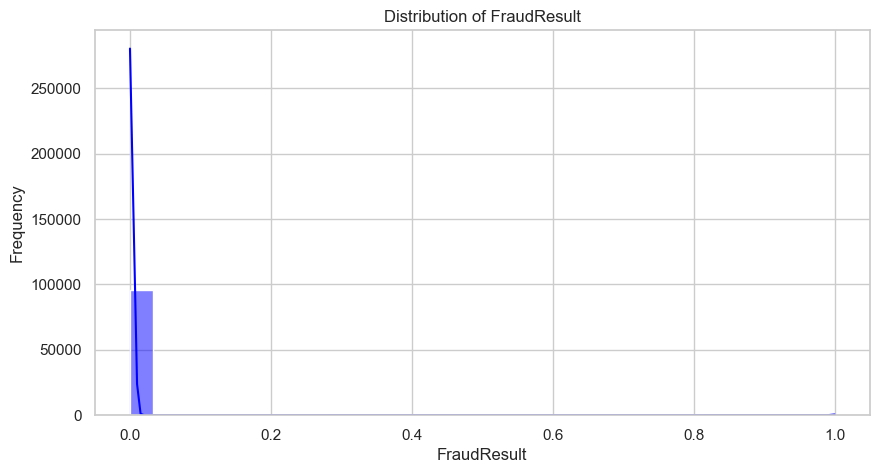

In [11]:
# Distribution of Numerical Features
print("\n### Distribution of Numerical Features ###")
eda.plot_numerical_distributions(numerical_features)

**_Key insights:_**

- Most of the numerical features exhibit right-skewness, indicating that there are a few extreme values that pull the mean to the right.

- The distributions of CountryCode, Amount, and Value have clear peaks, suggesting common values or ranges.

- The distribution of PricingStrategy has a clear peak at 2, indicating a preferred pricing strategy.

- The distribution of FraudResult shows a majority of non-fraudulent transactions.


### Distribution of Categorical Features ###
CurrencyCode: 1 unique values.


e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=feature, order=filtered_df[feature].value_counts().index, palette="muted")


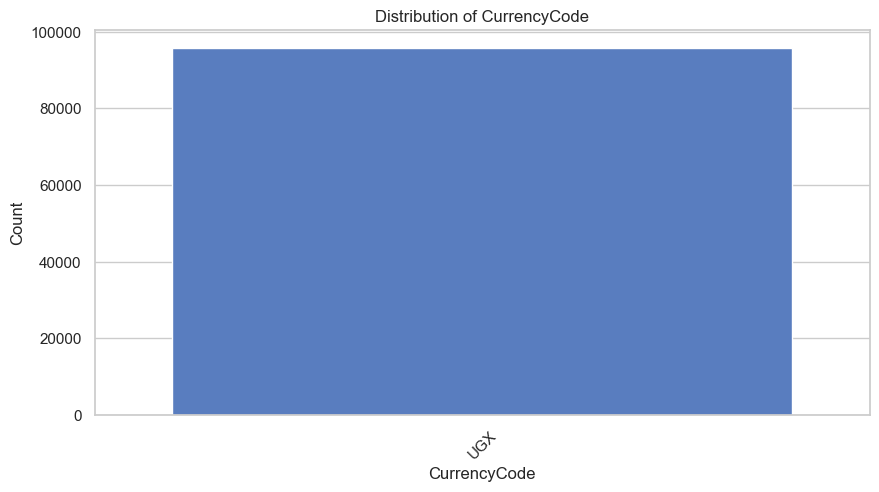

ProviderId: 6 unique values.


e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=feature, order=filtered_df[feature].value_counts().index, palette="muted")


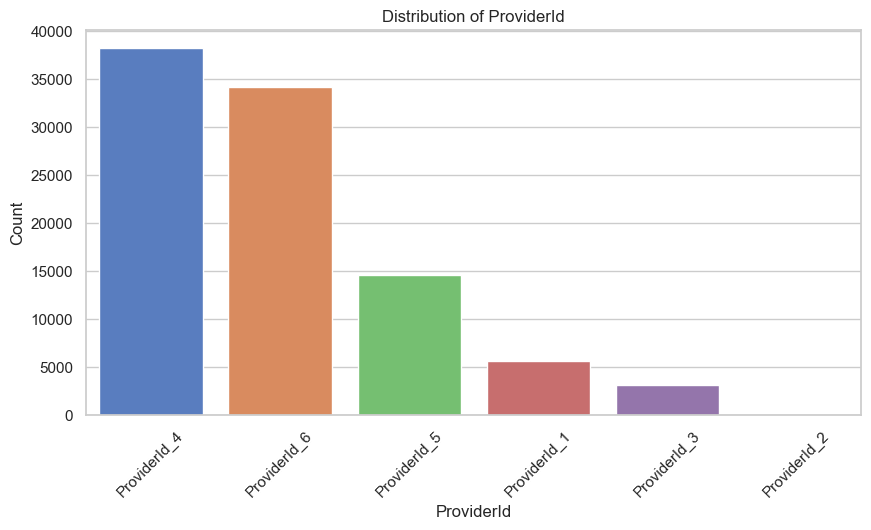

ChannelId: 4 unique values.


e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=feature, order=filtered_df[feature].value_counts().index, palette="muted")


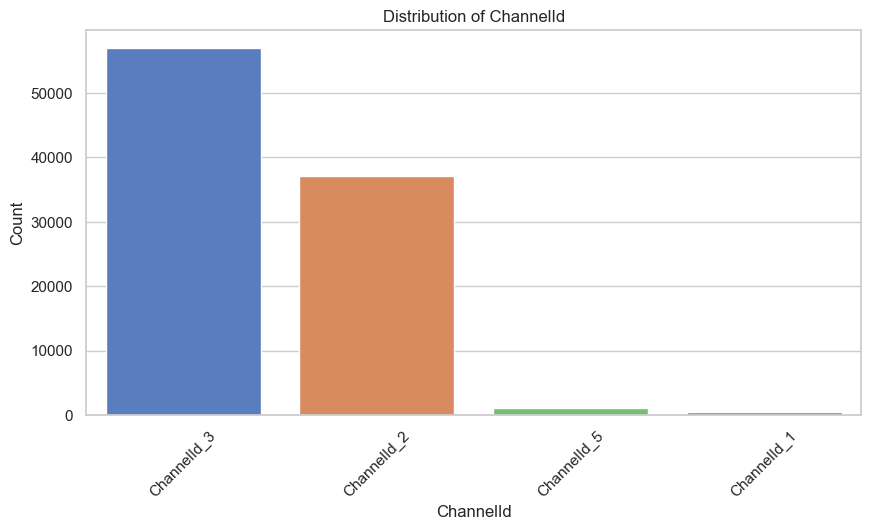

ProductCategory: 9 unique values.


e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=feature, order=filtered_df[feature].value_counts().index, palette="muted")


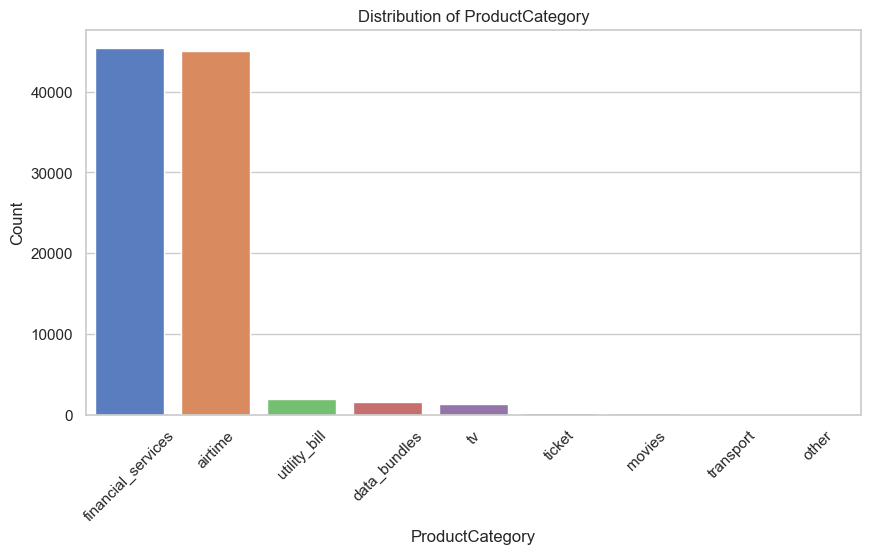

In [12]:
# Distribution of Categorical Features
print("\n### Distribution of Categorical Features ###")
eda.plot_categorical_distributions(categorical_features)

e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Hour", palette="viridis")


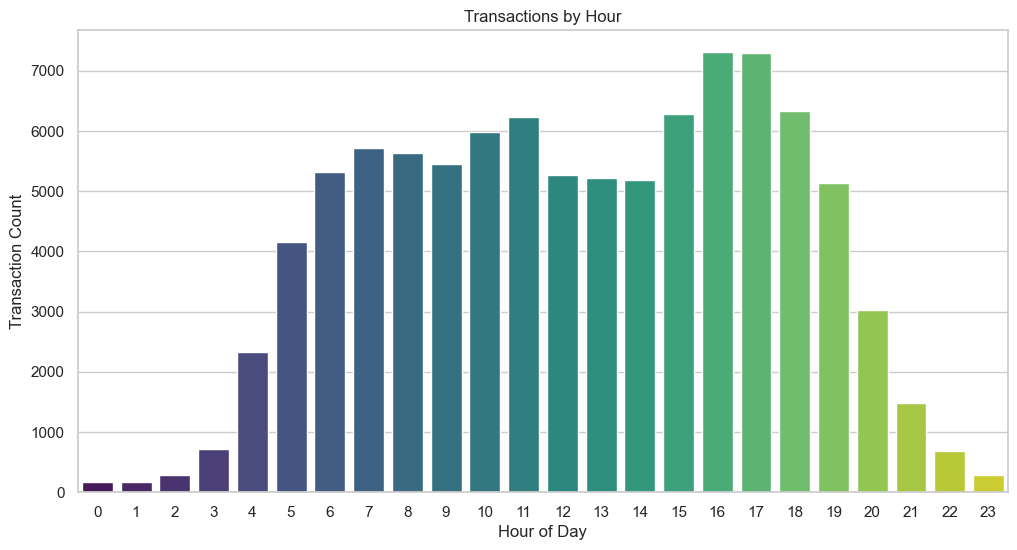

e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x="Day", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="muted")


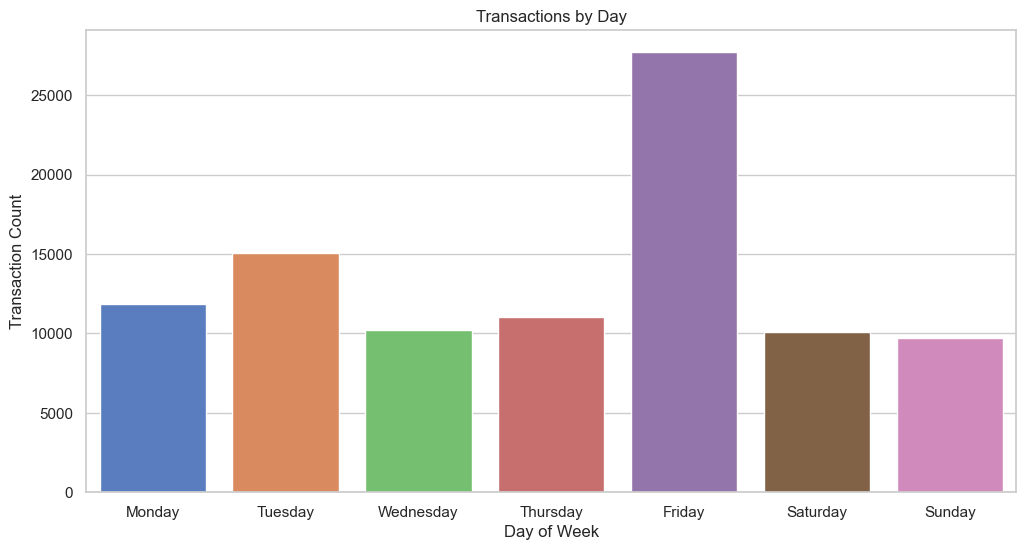

In [13]:
# Time series analysis
eda.time_based_analysis("TransactionStartTime")

**_Key Insights from Categorical Features:_**

- _CurrencyCode:_

The dataset is dominated by a single currency, UGX (Ugandan Shilling), which is the currency for all transactions. This uniformity indicates that the platform primarily handles transactions within Uganda. Since CurrencyCode is uniform across the entire dataset (with only UGX as the value), it does not provide any variability or discriminative power for future model training. As a result, it would not contribute meaningfully to the predictive model and can be excluded from the feature set during model development.

- _ProviderId:_

Two providers, ProviderId_6 and ProviderId_4, handle the majority of transactions, with counts of 34,186 and 38,189 respectively. This suggests a concentrated reliance on these providers for most services. Other providers have much smaller transaction volumes, with ProviderId_1 and ProviderId_5 contributing some, while ProviderId_2 has an almost negligible number of transactions.

- _ProductCategory:_

Two product categories, airtime (45,027) and financial_services (45,405), dominate the dataset. These are clearly the most popular categories, suggesting a focus on telecom and financial services transactions. Other categories like utility_bill, data_bundles, and tv have significantly fewer transactions, indicating less customer demand or offering.

- _ChannelId:_

The majority of transactions were made through ChannelId_3 (56,935) and ChannelId_2 (37,141), indicating these are the most popular channels. Other channels, such as ChannelId_1 and ChannelId_5, are used much less frequently.


### Correlation Analysis ###


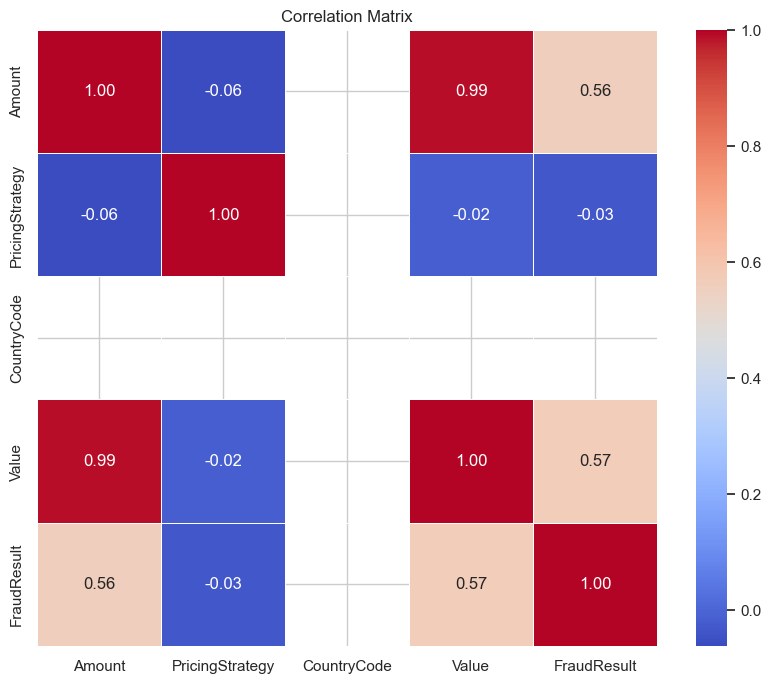

In [14]:
print("\n### Correlation Analysis ###")
eda.correlation_analysis(numerical_features)

- Amount and Value has strong positive correlation since they provide the same information. Value has no significance for future modeling

- Amount and FraudResults has moderate correlation

- PricingStrategy and Other features has no correlation

In [15]:
# Identifying Missing Values
print("\n### Missing Values ###")
eda.check_missing_values()




### Missing Values ###
No missing values found.



### Outlier Detection ###


e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=feature, palette="muted")


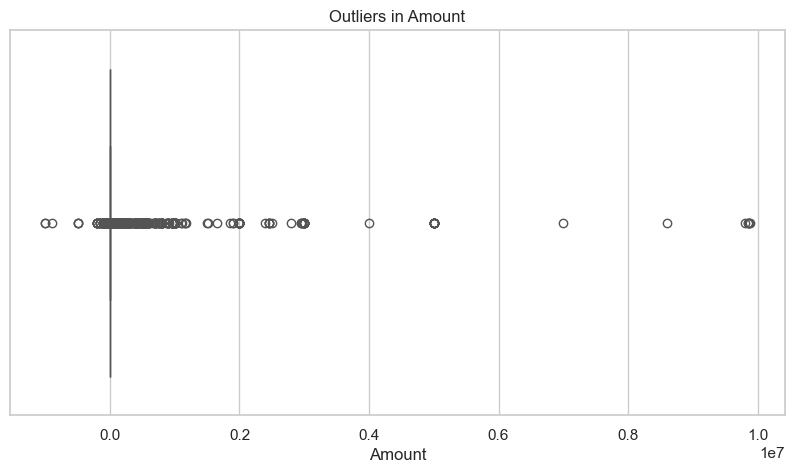

e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=feature, palette="muted")


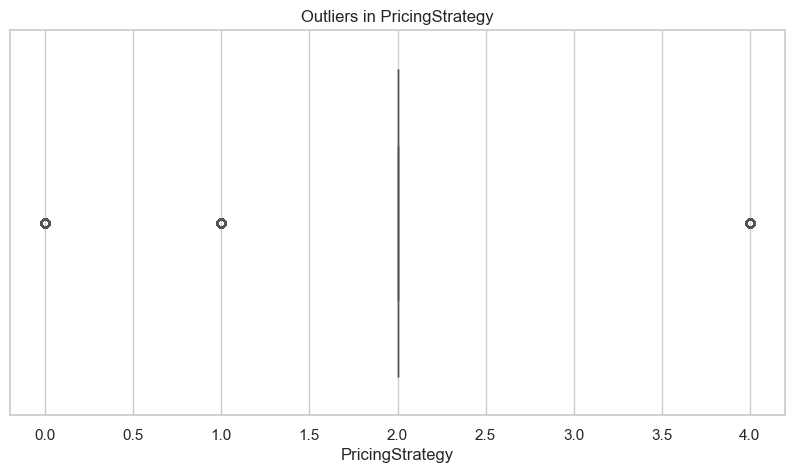

e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=feature, palette="muted")


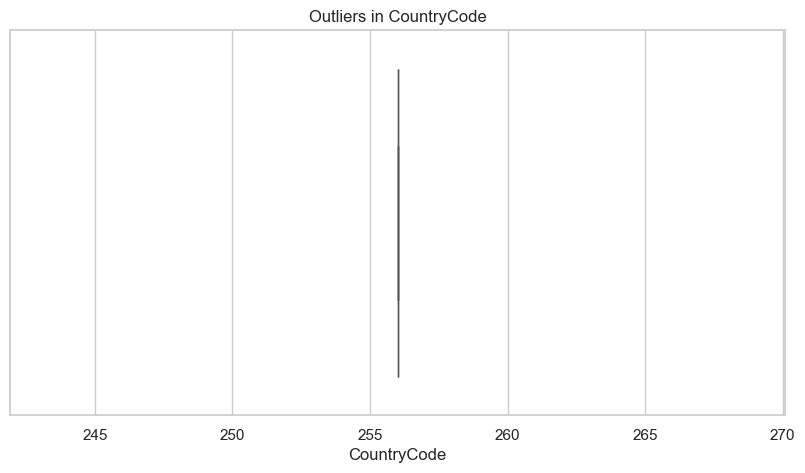

e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=feature, palette="muted")


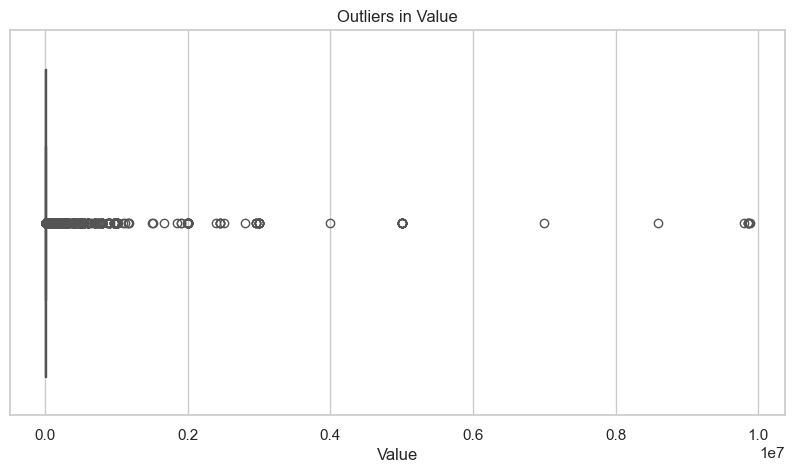

e:\Development\10-Accademy\Bat-bank-Credit-Scoring\src\EDA_processor.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=feature, palette="muted")


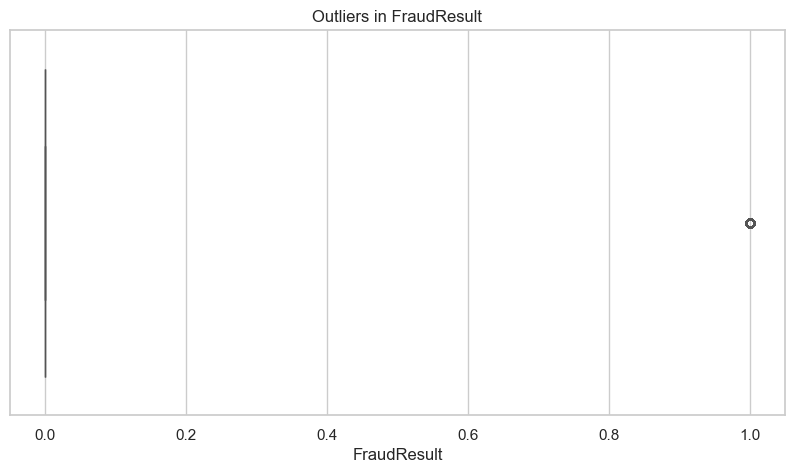

In [16]:
# Outlier Detection
print("\n### Outlier Detection ###")
outliered_data = eda.detect_outliers(numerical_features)

#### Boxplot of Transaction Amounts for Fraud and Non-Fraud Transactions

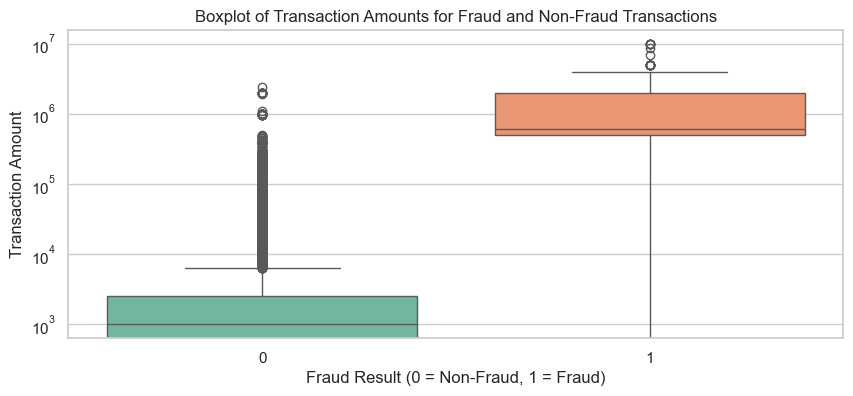

In [17]:


# Creating a plot to visualize the relationship between Amount and FraudResult
plt.figure(figsize=(10, 4))

# Plotting boxplot to compare Amount for FraudResult = 1 (fraudulent) and FraudResult = 0 (non-fraudulent)
sns.boxplot(x='FraudResult', y='Amount', hue='FraudResult', legend=False,data=outliered_data, palette="Set2")

plt.title('Boxplot of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraud Result (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Using log scale to handle the large range of amounts

plt.show()

FraudResult      0    1  Total
AmountRange                   
<1K          23935    1  23936
1K-5K        17316    0  17316
5K-10K       10051    0  10051
10K-50K       4865    3   4868
50K-100K       639    9    648
>100K          479  175    654
Total        57285  188  57473


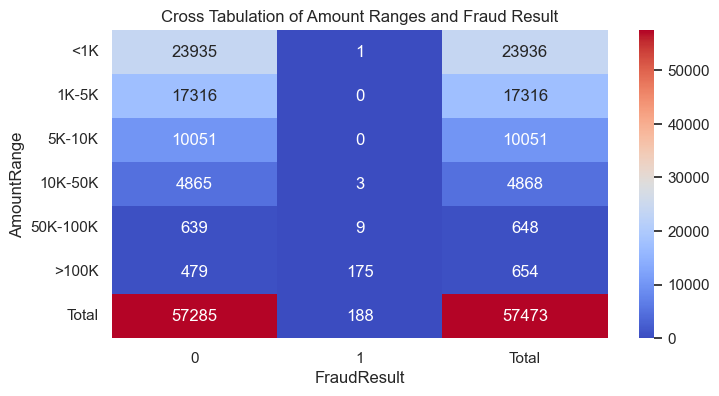

In [18]:
# Define bins for Amount ranges
import pandas as pd
bins = [0, 1000, 5000, 10000, 50000, 100000, outliered_data['Amount'].max()]
labels = ['<1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '>100K']
df_new = outliered_data.copy()
# Create a new column with binned Amount
df_new['AmountRange'] = pd.cut(df_new['Amount'], bins=bins, labels=labels, include_lowest=True)

# Create a cross-tabulation
cross_tab = pd.crosstab(df_new['AmountRange'], df_new['FraudResult'], margins=True, margins_name="Total")
print(cross_tab)

# Optional: Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='g')
plt.title('Cross Tabulation of Amount Ranges and Fraud Result')
plt.show()

**_Key insights from the cross-tabulation_**

- Low-value transactions (<1K): Nearly all transactions in this range are non-fraudulent, suggesting low risk.

- Medium-value transactions (1K-50K): Mid-range transactions also show low fraud rates, with just 3 frauds in the 10K-50K range.

- High-value transactions (50K-100K): Fraud increases to about 1.39% in this range, indicating higher risk.

- Very high-value transactions (>100K): Around 26.7% of these transactions are fraudulent, showing a strong link between large amounts and fraud.